# **Sign Language Recognition using Deep Learning: MNIST Dataset Analysis**
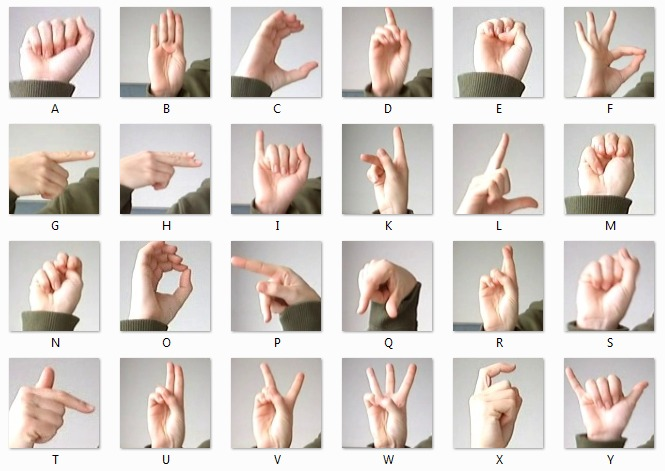

# **Abstract**:
Sign language is a crucial means of communication for individuals with hearing impairments. In this project:


* We aim to develop a fully functional AI system using deep learning techniques,
specifically neural networks, to recognize hand gestures corresponding to American Sign Language (ASL) alphabets.
* Using the Sign Language MNIST dataset, we will conduct Exploratory Data Analysis (EDA), preprocess the data, and train a classification model to accurately identify different hand signs.
* This project aims to enhance accessibility and communication by leveraging state-of-the-art deep learning models for sign language recognition.








# **Problem Statement:**
People with hearing impairments primarily rely on sign language for communication. However, many individuals are unfamiliar with sign language, creating a barrier between the deaf and hearing communities. Traditional text-based communication methods are often ineffective in real-time conversations.

The Sign Language MNIST dataset provides an opportunity to train a deep learning model using neural networks to recognize ASL alphabets from hand gesture images. This project aims to develop an AI-powered system that accurately interprets sign language symbols and translates them into readable text. By leveraging Convolutional Neural Networks (CNNs) and other deep learning techniques, we aim to create a robust model that enhances accessibility and inclusivity for individuals with hearing impairments.

## **Objectives**:


1.   Develop a Sign Language Recognition System – Train a deep learning model using neural networks to classify hand signs representing ASL alphabets.

1.   Perform Exploratory Data Analysis (EDA) – Analyze the dataset to understand its structure, distribution, and potential challenges before training the model.

1.   Preprocess and Augment Data – Apply necessary transformations, such as normalization, resizing, and augmentation, to enhance model performance and generalization.
2.   Train and Evaluate Deep Learning Models – Experiment with different neural network architectures (e.g., Convolutional Neural Networks - CNNs) to achieve high accuracy.

1.   Optimize and Fine-Tune the Model – Use techniques such as hyperparameter tuning, dropout, and batch normalization to improve the model's efficiency and robustness.











# **Name and Source of Dataset**
Dataset Name: Sign Language MNIST

Source: https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data/

Description: The dataset contains images of hand signs corresponding to the
American Sign Language (ASL) alphabets, specifically A to Y (excluding J and Z, as they require motion).


### **Exploratory Data Analysis (EDA)**

      We'll analyze the dataset to understand:
        1.   Understanding the dataset and its shape
        2.   Checking the type of data and each column
        3.   Categorical and Numerical Columns
        4.   Checking for missing values and inconsistencies
        5.   Descriptive summary of the dataset
        6.   Groupby for classification problem
        7.   The distribution of images across classes
        8.   Sample images for visualization




# **Importing Libraries**

In [1]:
# Import required module
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import cv2
from sklearn.decomposition import PCA
from skimage.feature import hog
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#loading the training dataset from csv file to pandas data frame - directly from github
train_url = "https://raw.githubusercontent.com/mewawalaabdeali/AI-Project/main/sign_mnist_train/sign_mnist_train.csv"
train_data = pd.read_csv(train_url)

# Display the first few rows
print(train_data.head())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [3]:
#loading the test dataset from csv file to pandas data frame - directly from github
test_url = "https://raw.githubusercontent.com/mewawalaabdeali/AI-Project/main/sign_mnist_test/sign_mnist_test.csv"
test_data = pd.read_csv(test_url)

# Display the first few rows
print(test_data.head())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

In [4]:
# Display dataset structure
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (27455, 785)
Testing Data Shape: (7172, 785)


In [5]:
#checking the datatypes
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [6]:
# Check for missing values
print("Missing Values in Training Data:")
print(train_data.isnull().sum().sum())
print("Missing Values in Testing Data:")
print(test_data.isnull().sum().sum())

Missing Values in Training Data:
0
Missing Values in Testing Data:
0


In [7]:
# Check for duplicate rows
print("Duplicate Rows in Training Data:", train_data.duplicated().sum())
print("Duplicate Rows in Testing Data:", test_data.duplicated().sum())

Duplicate Rows in Training Data: 0
Duplicate Rows in Testing Data: 0


In [8]:
# describe the data
print("describe the Training Data:", train_data.describe())
print("describe the Test Data:", train_data.describe())

describe the Training Data:               label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.318813    145.419377    148.500273    151.247714    153.546531   
std        7.287552     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max       24.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165    

In [9]:
# label count of the data
print("label count of the Training Data:", train_data['label'].value_counts())
print("label count of the Test Data:", test_data['label'].value_counts())

label count of the Training Data: label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64
label count of the Test Data: label
4     498
7     436
1     432
12    394
6     348
15    347
21    346
24    332
0     331
10    331
2     310
13    291
8     288
23    267
20    266
19    248
5     247
14    246
18    246
3     245
11    209
22    206
16    164
17    144
Name: count, dtype: int64


In [10]:
# label mean of the data
print("label mean of the Training Data:", train_data.groupby('label').mean())
print("label mean of the Test Data:", test_data.groupby('label').mean())

label mean of the Training Data:            pixel1      pixel2      pixel3      pixel4      pixel5      pixel6  \
label                                                                           
0      164.192718  165.654529  162.869449  161.313499  164.491119  166.727353   
1      145.215842  147.747525  150.145545  152.939604  153.605941  156.361386   
2      160.759615  163.133741  165.435315  167.272727  168.677448  169.820804   
3      135.755853  139.376254  143.024247  148.172241  152.219900  155.625418   
4      165.823406  167.623824  169.475444  171.073145  172.587252  173.821317   
5      142.225914  146.210963  149.949336  153.074751  156.021595  158.924419   
6      172.902752  174.281651  175.629358  177.147706  178.300917  179.241284   
7      164.142152  166.440276  168.638697  170.805528  172.312932  173.537019   
8      158.496558  160.747849  163.317556  165.046472  166.765921  168.179862   
10      98.201077  105.070916  106.421903  106.517056  110.669659  113.52962

In [11]:
#creating a duplicate dataframe and filling missing values
train_df_filled = train_data.copy()
train_df_filled.iloc[:,1:] = train_data.groupby('label').transform(lambda x: x.fillna(x.mean()))

# making a copy with x_train
x_train = train_df_filled.copy()
print(x_train.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [12]:
#creating a duplicate dataframe and filling missing values
test_df_filled = test_data.copy()
test_df_filled.iloc[:,1:] = test_data.groupby('label').transform(lambda x: x.fillna(x.mean()))

# making a copy with x_train
x_test = test_df_filled.copy()
print(x_test.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

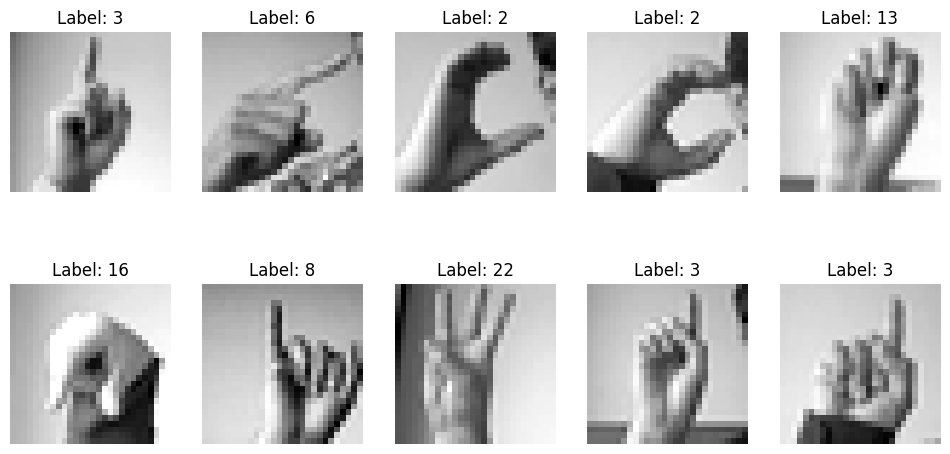

In [13]:
# Display some sample images
def plot_samples(df, n=10):
    plt.figure(figsize=(12,6))
    for i in range(n):
        plt.subplot(2, 5, i+1)
        img = np.array(df.iloc[i, 1:]).reshape(28,28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {df.iloc[i, 0]}")
        plt.axis('off')
    plt.show()

plot_samples(x_train)

<ipython-input-14-2e1ea0321760>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_train['label'], palette="viridis")


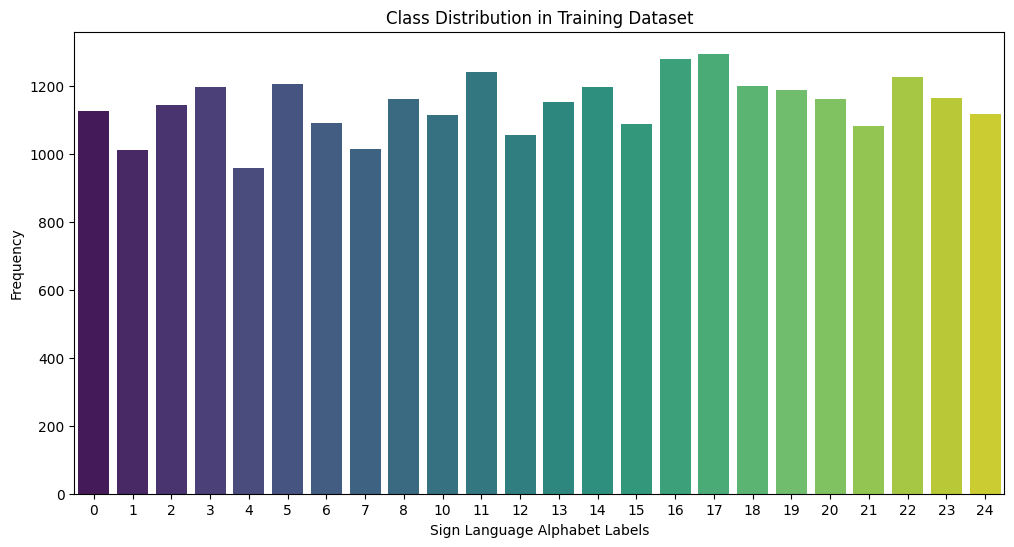

In [14]:
# Class Distribution of train data
plt.figure(figsize=(12,6))
sns.countplot(x=x_train['label'], palette="viridis")
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Sign Language Alphabet Labels")
plt.ylabel("Frequency")
plt.show()

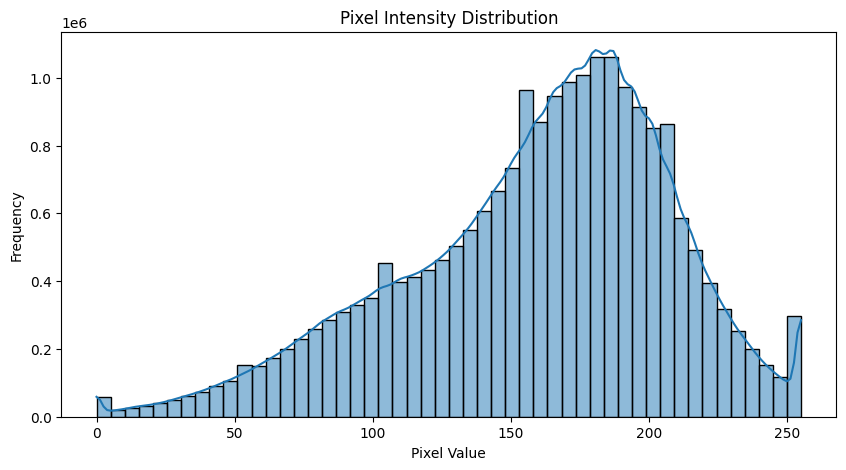

In [15]:
# Pixel Intensity Distribution
plt.figure(figsize=(10,5))
sns.histplot(x_train.iloc[:, 1:].values.flatten(), bins=50, kde=True)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

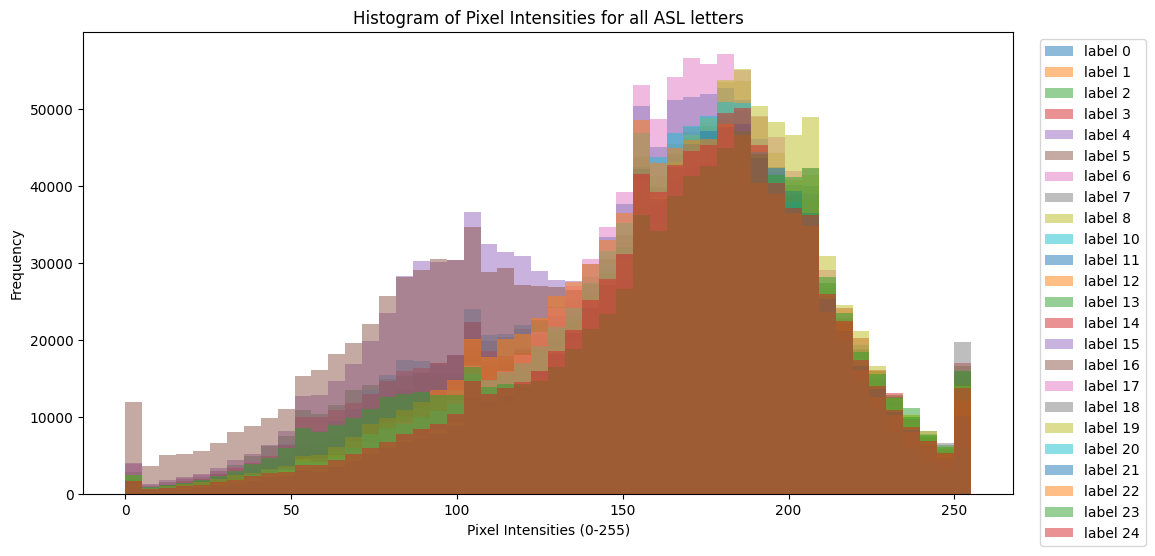

In [16]:
#Histogram of Pixel Intensities for all ASL letters
plt.figure(figsize=(12,6))

for label in sorted(x_train['label'].unique()):
  class_pixel = x_train[x_train['label']==label].iloc[:,1:].values.flatten()
  plt.hist(class_pixel, bins=50, alpha=0.5, label=f"label {label}")


plt.title("Histogram of Pixel Intensities for all ASL letters")
plt.xlabel("Pixel Intensities (0-255)")
plt.ylabel("Frequency")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

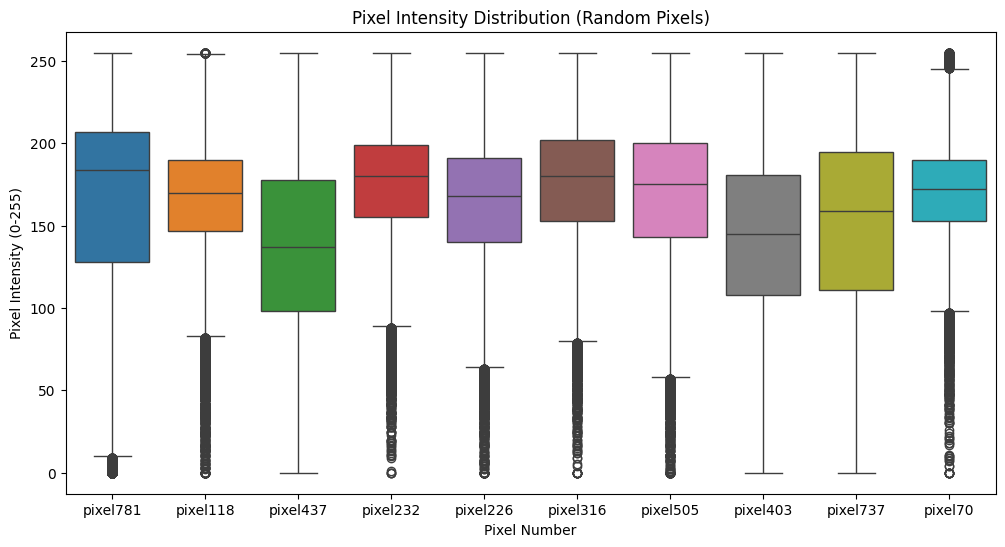

In [17]:
#Pixel Intensity Distribution (Random Pixels) - boxplot
import seaborn as sns

# Select a few random pixels to analyze
selected_pixels = np.random.choice(range(1, 785), 10, replace=False)

# Create a DataFrame with selected pixel intensities
pixel_data = train_df_filled.iloc[:, selected_pixels]

# Plot boxplot for selected pixels
plt.figure(figsize=(12, 6))
sns.boxplot(data=pixel_data)
plt.title("Pixel Intensity Distribution (Random Pixels)")
plt.xlabel("Pixel Number")
plt.ylabel("Pixel Intensity (0-255)")
plt.show()

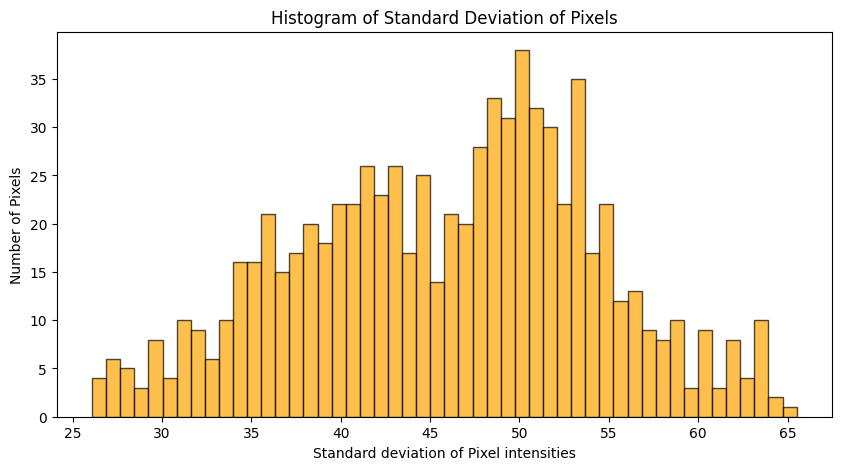

In [18]:
#Histogram of Standard Deviation of Pixels
std_pixel_values=x_train.iloc[:,1:].std(axis=0)

plt.figure(figsize=(10,5))
plt.hist(std_pixel_values, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Histogram of Standard Deviation of Pixels")
plt.xlabel("Standard deviation of Pixel intensities")
plt.ylabel("Number of Pixels")
plt.show()

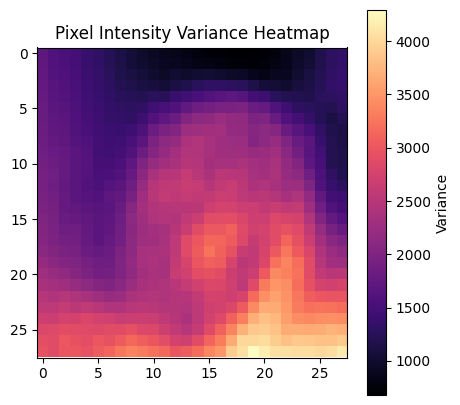

In [19]:
# Compute pixel variance for the entire dataset
pixel_variances = x_train.iloc[:, 1:].var().values.reshape(28, 28)

# Plot the heatmap
plt.figure(figsize=(5, 5))
plt.imshow(pixel_variances, cmap="magma")
plt.title("Pixel Intensity Variance Heatmap")
plt.colorbar(label="Variance")
plt.show()

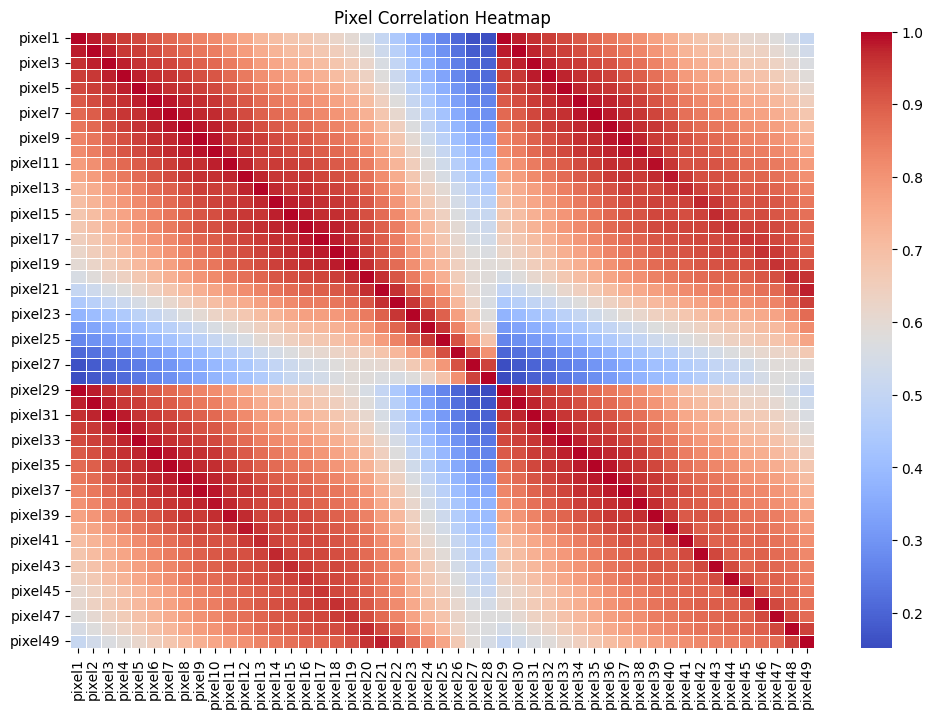

In [20]:
#Plotting heatmap of pixel correlation
import seaborn as sns

#Computing correlation matrix for small number of pixel
corr_matrix = x_train.iloc[:,1:50].corr()

#Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Pixel Correlation Heatmap")
plt.show()

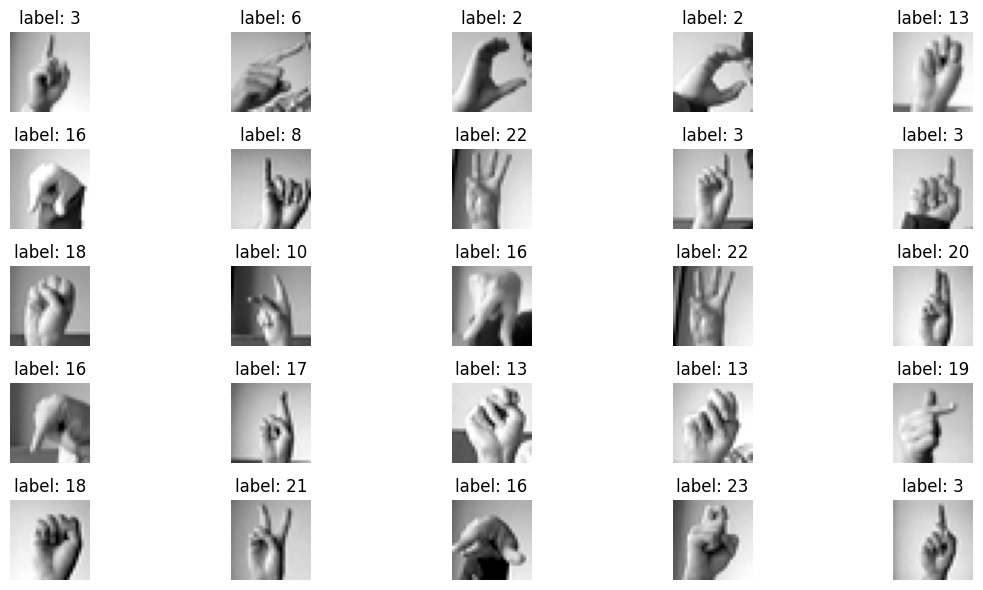

In [21]:
#Extract Label and pixel values
labels = x_train['label'].values
images = train_df_filled.iloc[:,1:].values

#Reshape few images to 28x28
images = images.reshape(-1, 28, 28)

#Plot some sample images
fig, axes = plt.subplots(5,5, figsize=(12,6))
axes = axes.ravel()


for i in range(25):
  axes[i].imshow(images[i], cmap='gray')
  axes[i].set_title(f"label: {labels[i]}")
  axes[i].axis("off")

plt.tight_layout()
plt.show()

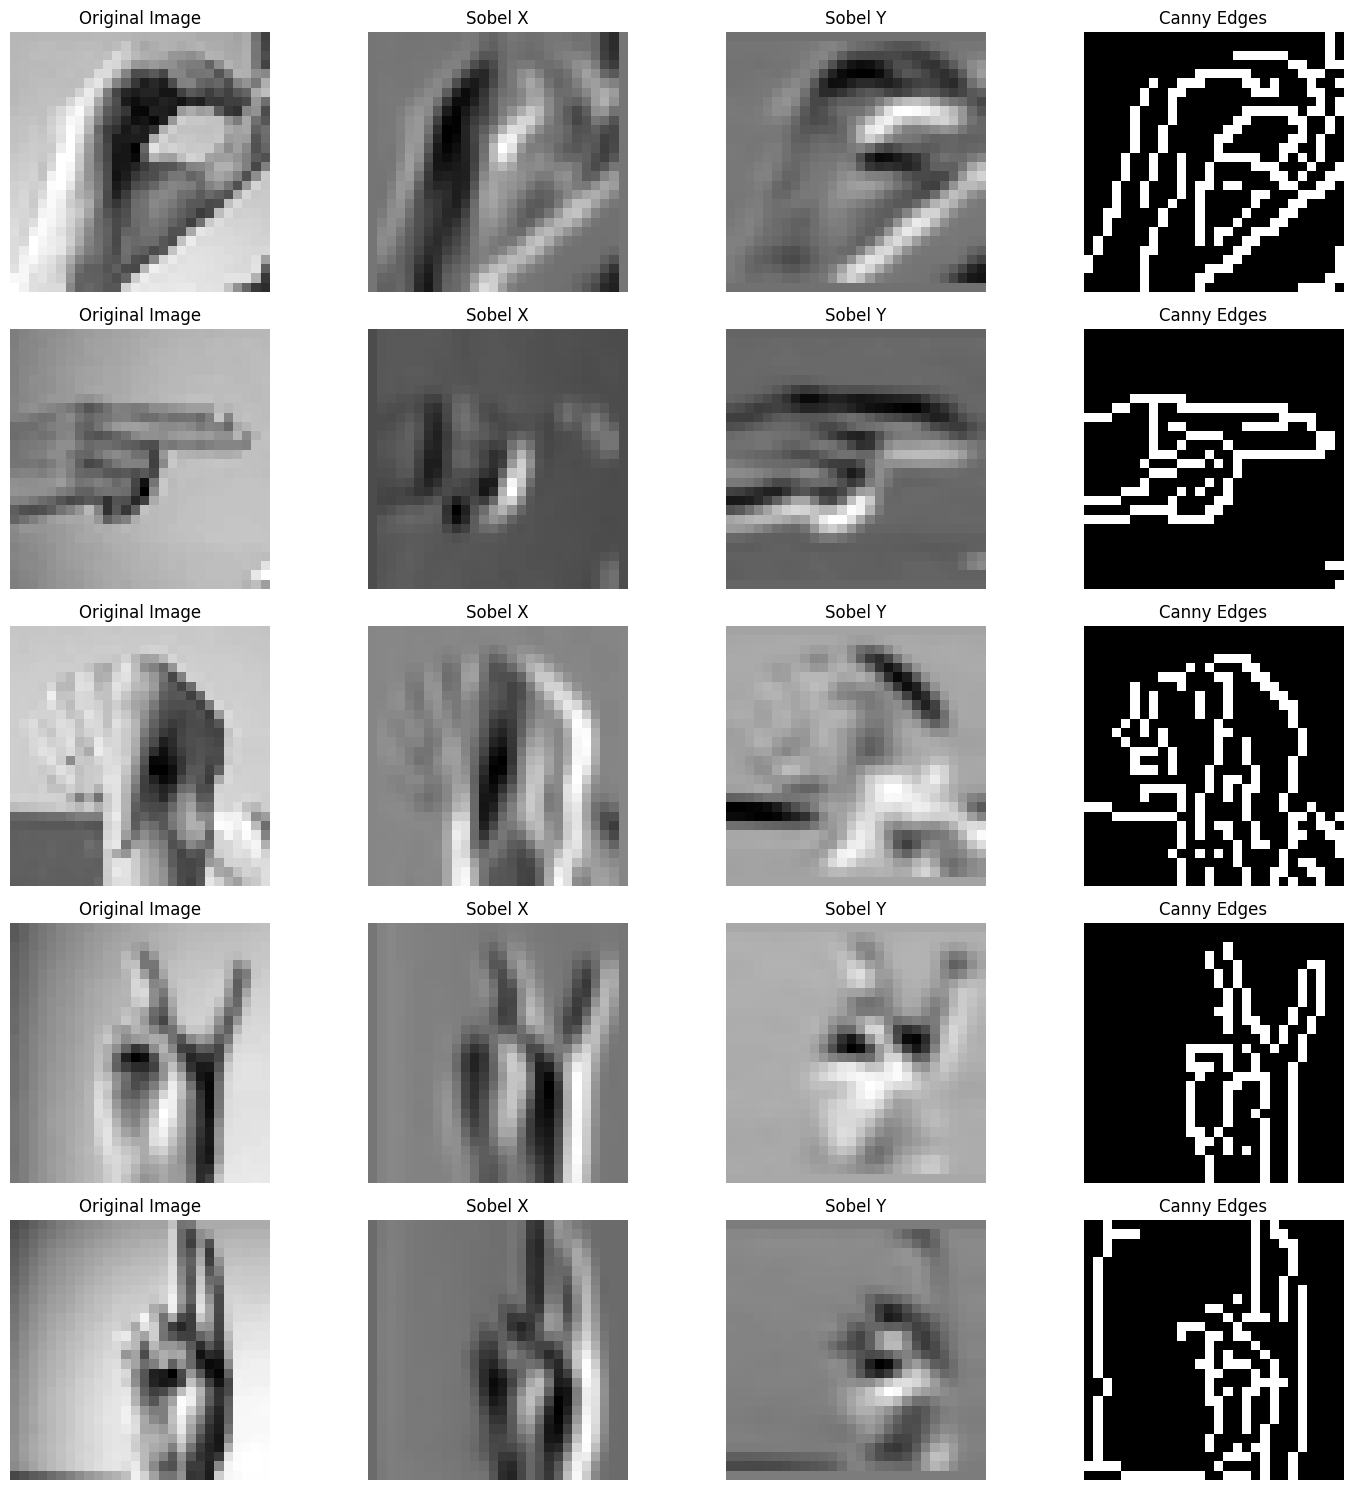

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Randomly selecting 5 images from the dataset
random_indices = np.random.choice(len(images), 5,  replace = False)
sample_images = images[random_indices]

#Plot the original and edge-detected image
fig, axes = plt.subplots(5,4, figsize=(15,15))

for i, img in enumerate(sample_images):
  img=np.uint8(img)
  sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize=5)
  sobely = cv2.Sobel(img, cv2.CV_64F, 0,1, ksize=5)

  canny_edges= cv2.Canny(np.uint8(img), 50, 150)

  axes[i,0].imshow(img, cmap='gray')
  axes[i,0].set_title("Original Image")
  axes[i,1].imshow(sobelx, cmap='gray')
  axes[i,1].set_title("Sobel X")
  axes[i,2].imshow(sobely, cmap='gray')
  axes[i,2].set_title("Sobel Y")
  axes[i,3].imshow(canny_edges, cmap='gray')
  axes[i,3].set_title("Canny Edges")

  for ax in axes[i]:
    ax.axis('off')

plt.tight_layout()
plt.show()

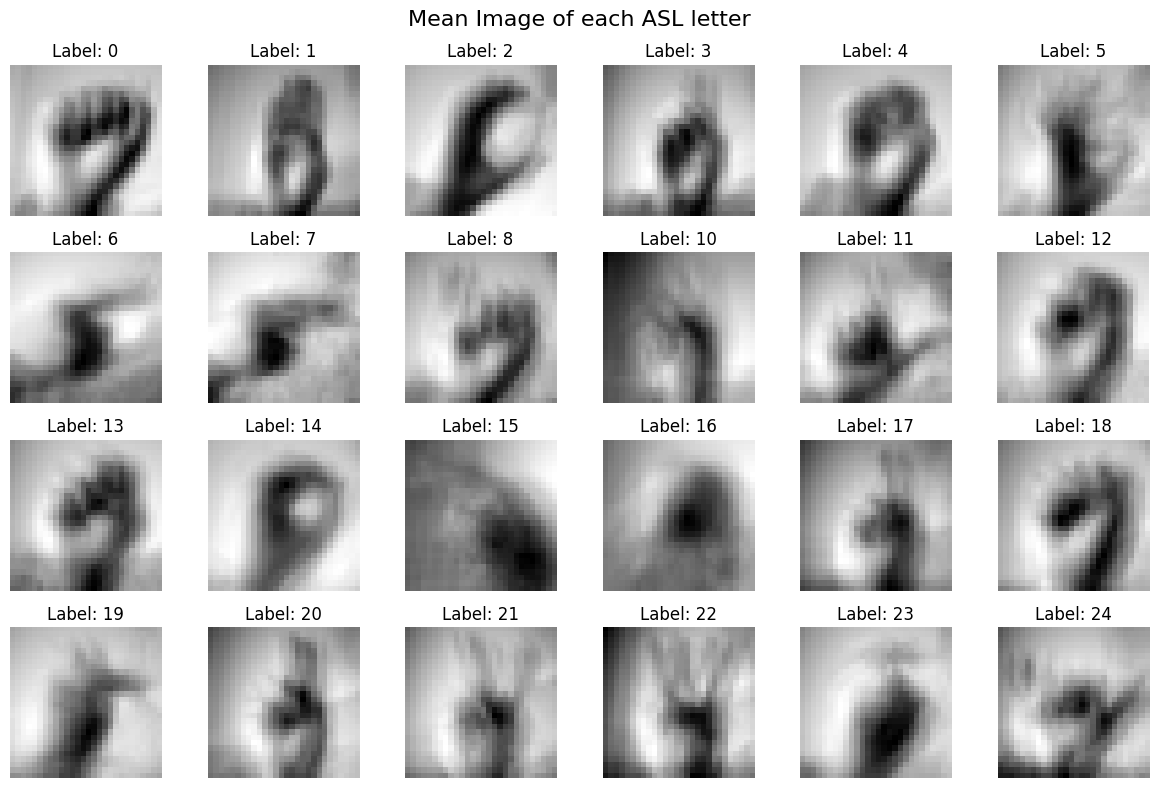

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#Compute the mean image for each class
unique_labels = np.unique(train_df_filled['label'])
fig, axes = plt.subplots(4,6, figsize=(12, 8))

for i, label in enumerate(unique_labels):
  mean_image = train_df_filled[train_df_filled['label']==label].iloc[:,1:].mean().values.reshape(28,28)
  ax = axes[i //6, i%6]
  ax.imshow(mean_image, cmap='gray')
  ax.set_title(f"Label: {label}")
  ax.axis("off")

plt.suptitle("Mean Image of each ASL letter", fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
# Function to load and preprocess an image
def load_and_preprocess_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    return img

def apply_filters(img):
    gaussian = cv2.GaussianBlur(img, (5, 5), 0)
    median = cv2.medianBlur(img, 5)
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    return gaussian, median, bilateral

def detect_edges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.uint8(sobel / sobel.max() * 255)
    canny = cv2.Canny(gray, 100, 200)
    return sobel, canny

def detect_corners(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)
    img[corners > 0.01 * corners.max()] = [255, 0, 0]
    return img

def apply_sift(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(gray, None)
    img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_sift

def compute_hog(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, hog_image = hog(gray, visualize=True)
    return hog_image

In [25]:
def display_image(image, title):
    plt.figure(figsize=(20, 10))
    if len(image.shape) == 2:  # Grayscale image
        plt.imshow(image, cmap='gray')
    else:  # Color image
        plt.imshow(image)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

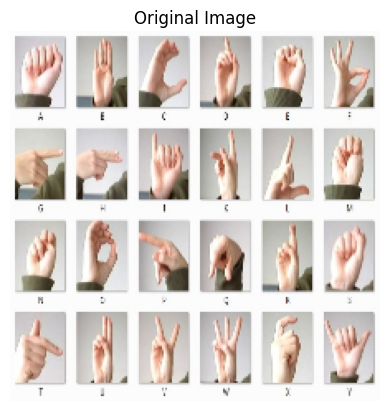

In [26]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# ------------------------------
# Load Image from URL Function
# ------------------------------
def load_and_preprocess_image(url):
    """Load image from a URL and preprocess it."""
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))  # Open image using PIL
        img = img.convert('RGB')  # Convert to RGB
        img = np.array(img)  # Convert to NumPy array
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert to OpenCV format
        img = cv2.resize(img, (224, 224))  # Resize for visualization
        return img
    else:
        print(f"Error: Unable to load image, status code {response.status_code}")
        return None

# ------------------------------
# Load Image from GitHub
# ------------------------------
img_url = "https://raw.githubusercontent.com/mewawalaabdeali/AI-Project/main/images/sign_lang_alpha.jpg"
img = load_and_preprocess_image(img_url)

# Display the Original Image
if img is not None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()


In [27]:
def display_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


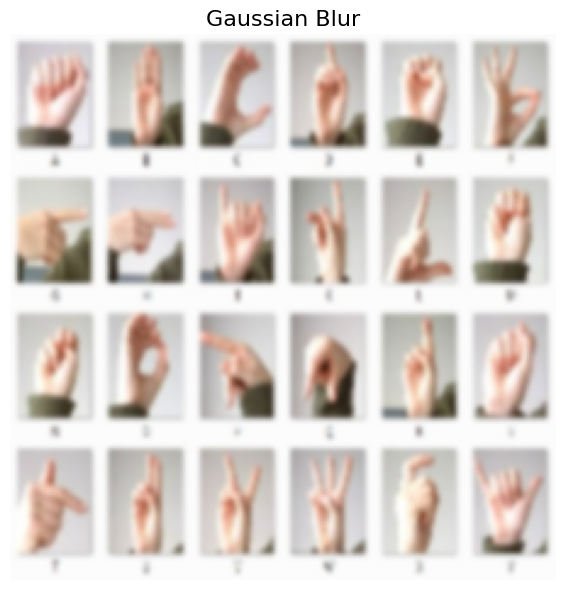

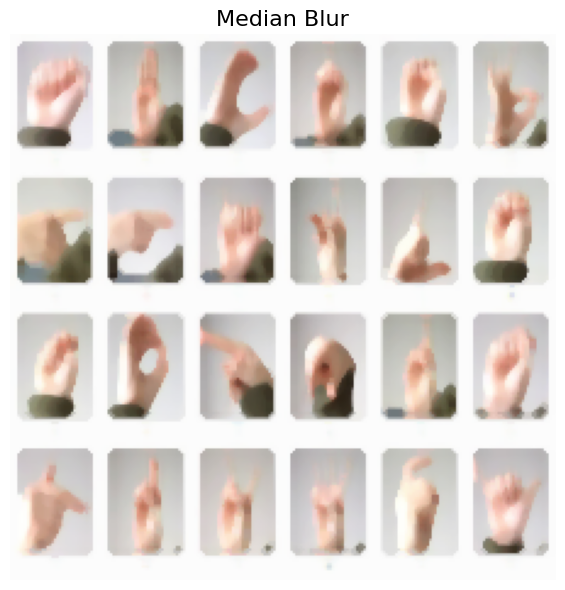

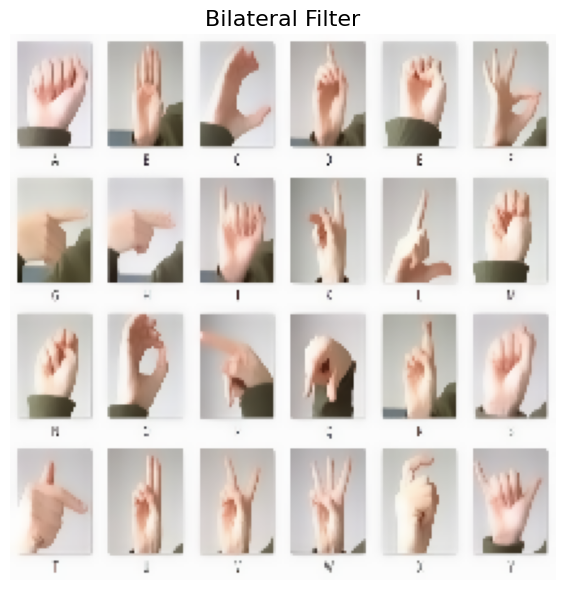

In [28]:
def apply_filters(img):
    gaussian = cv2.GaussianBlur(img, (5, 5), 0)
    median = cv2.medianBlur(img, 5)
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    return gaussian, median, bilateral

gaussian, median, bilateral = apply_filters(img)
display_image(gaussian, 'Gaussian Blur')
display_image(median, 'Median Blur')
display_image(bilateral, 'Bilateral Filter')




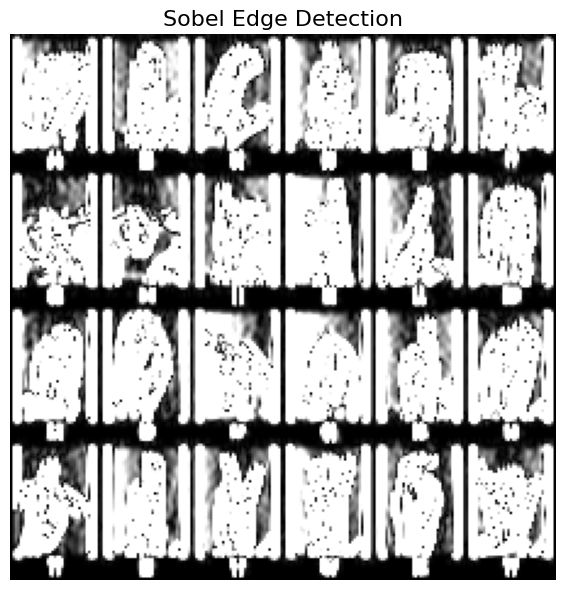

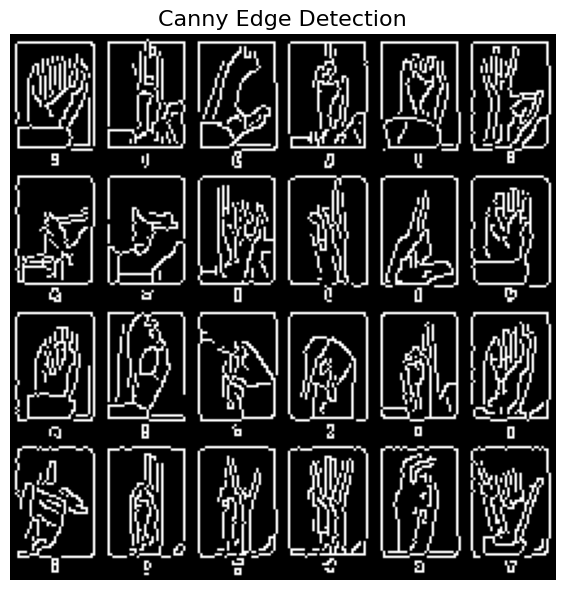

In [29]:
def detect_edges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Sobel Edge Detection (Convert to uint8)
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Compute Sobel
    sobel = cv2.convertScaleAbs(sobel)  # Convert float64 to uint8

    # Canny Edge Detection (Already uint8)
    canny = cv2.Canny(gray, 100, 200)

    return sobel, canny

# Apply Edge Detection
sobel, canny = detect_edges(img)

# Display Results
display_image(sobel, 'Sobel Edge Detection')  # Now it's uint8
display_image(canny, 'Canny Edge Detection')  # Already uint8


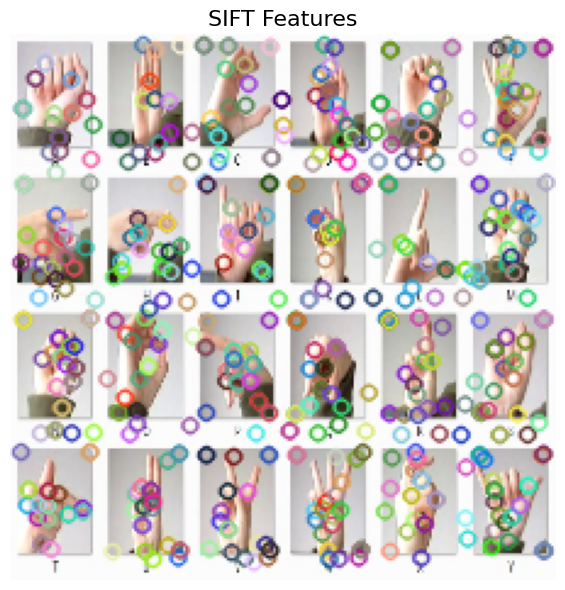

In [30]:
def apply_sift(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(gray, None)
    img_sift = cv2.drawKeypoints(img, keypoints, None)
    return img_sift

sift_img = apply_sift(img)
display_image(sift_img, 'SIFT Features')


In [31]:
# Extract 5 random images from the dataset
random_indices = np.random.choice(len(x_train), 5, replace=False)
sample_images = x_train.iloc[random_indices, 1:].values  # Skip first column (labels)
sample_images = sample_images.reshape(5, 28, 28).astype(np.uint8)  # Reshape to 28x28

# Resize images to 224x224 for visualization
resized_images = [cv2.resize(img, (224, 224)) for img in sample_images]

In [32]:
# ------------------------------
# Define Image Processing Functions
# ------------------------------
def apply_filters(img):
    """Apply Gaussian, Median, and Bilateral Filters."""
    gaussian = cv2.GaussianBlur(img, (5, 5), 0)
    median = cv2.medianBlur(img, 5)
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    return gaussian, median, bilateral

def detect_edges(img):
    """Detect edges using Sobel and Canny."""
    gray = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for consistency
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.uint8(sobel / sobel.max() * 255)
    canny = cv2.Canny(gray, 100, 200)
    return sobel, canny

def detect_corners(img):
    """Detect corners using Harris Corner Detection."""
    gray = np.float32(img)  # Convert to float32
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)  # Dilate to enhance visibility

    # Convert grayscale image to BGR for visualization
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Apply red color to detected corners
    img_bgr[corners > 0.01 * corners.max()] = [255, 0, 0]

    return img_bgr


def apply_sift(img):
    """Apply SIFT feature detection."""
    gray = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(gray, None)
    img_sift = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_sift

def compute_hog(img):
    """Compute Histogram of Oriented Gradients (HOG)."""
    _, hog_image = hog(img, visualize=True)
    return hog_image

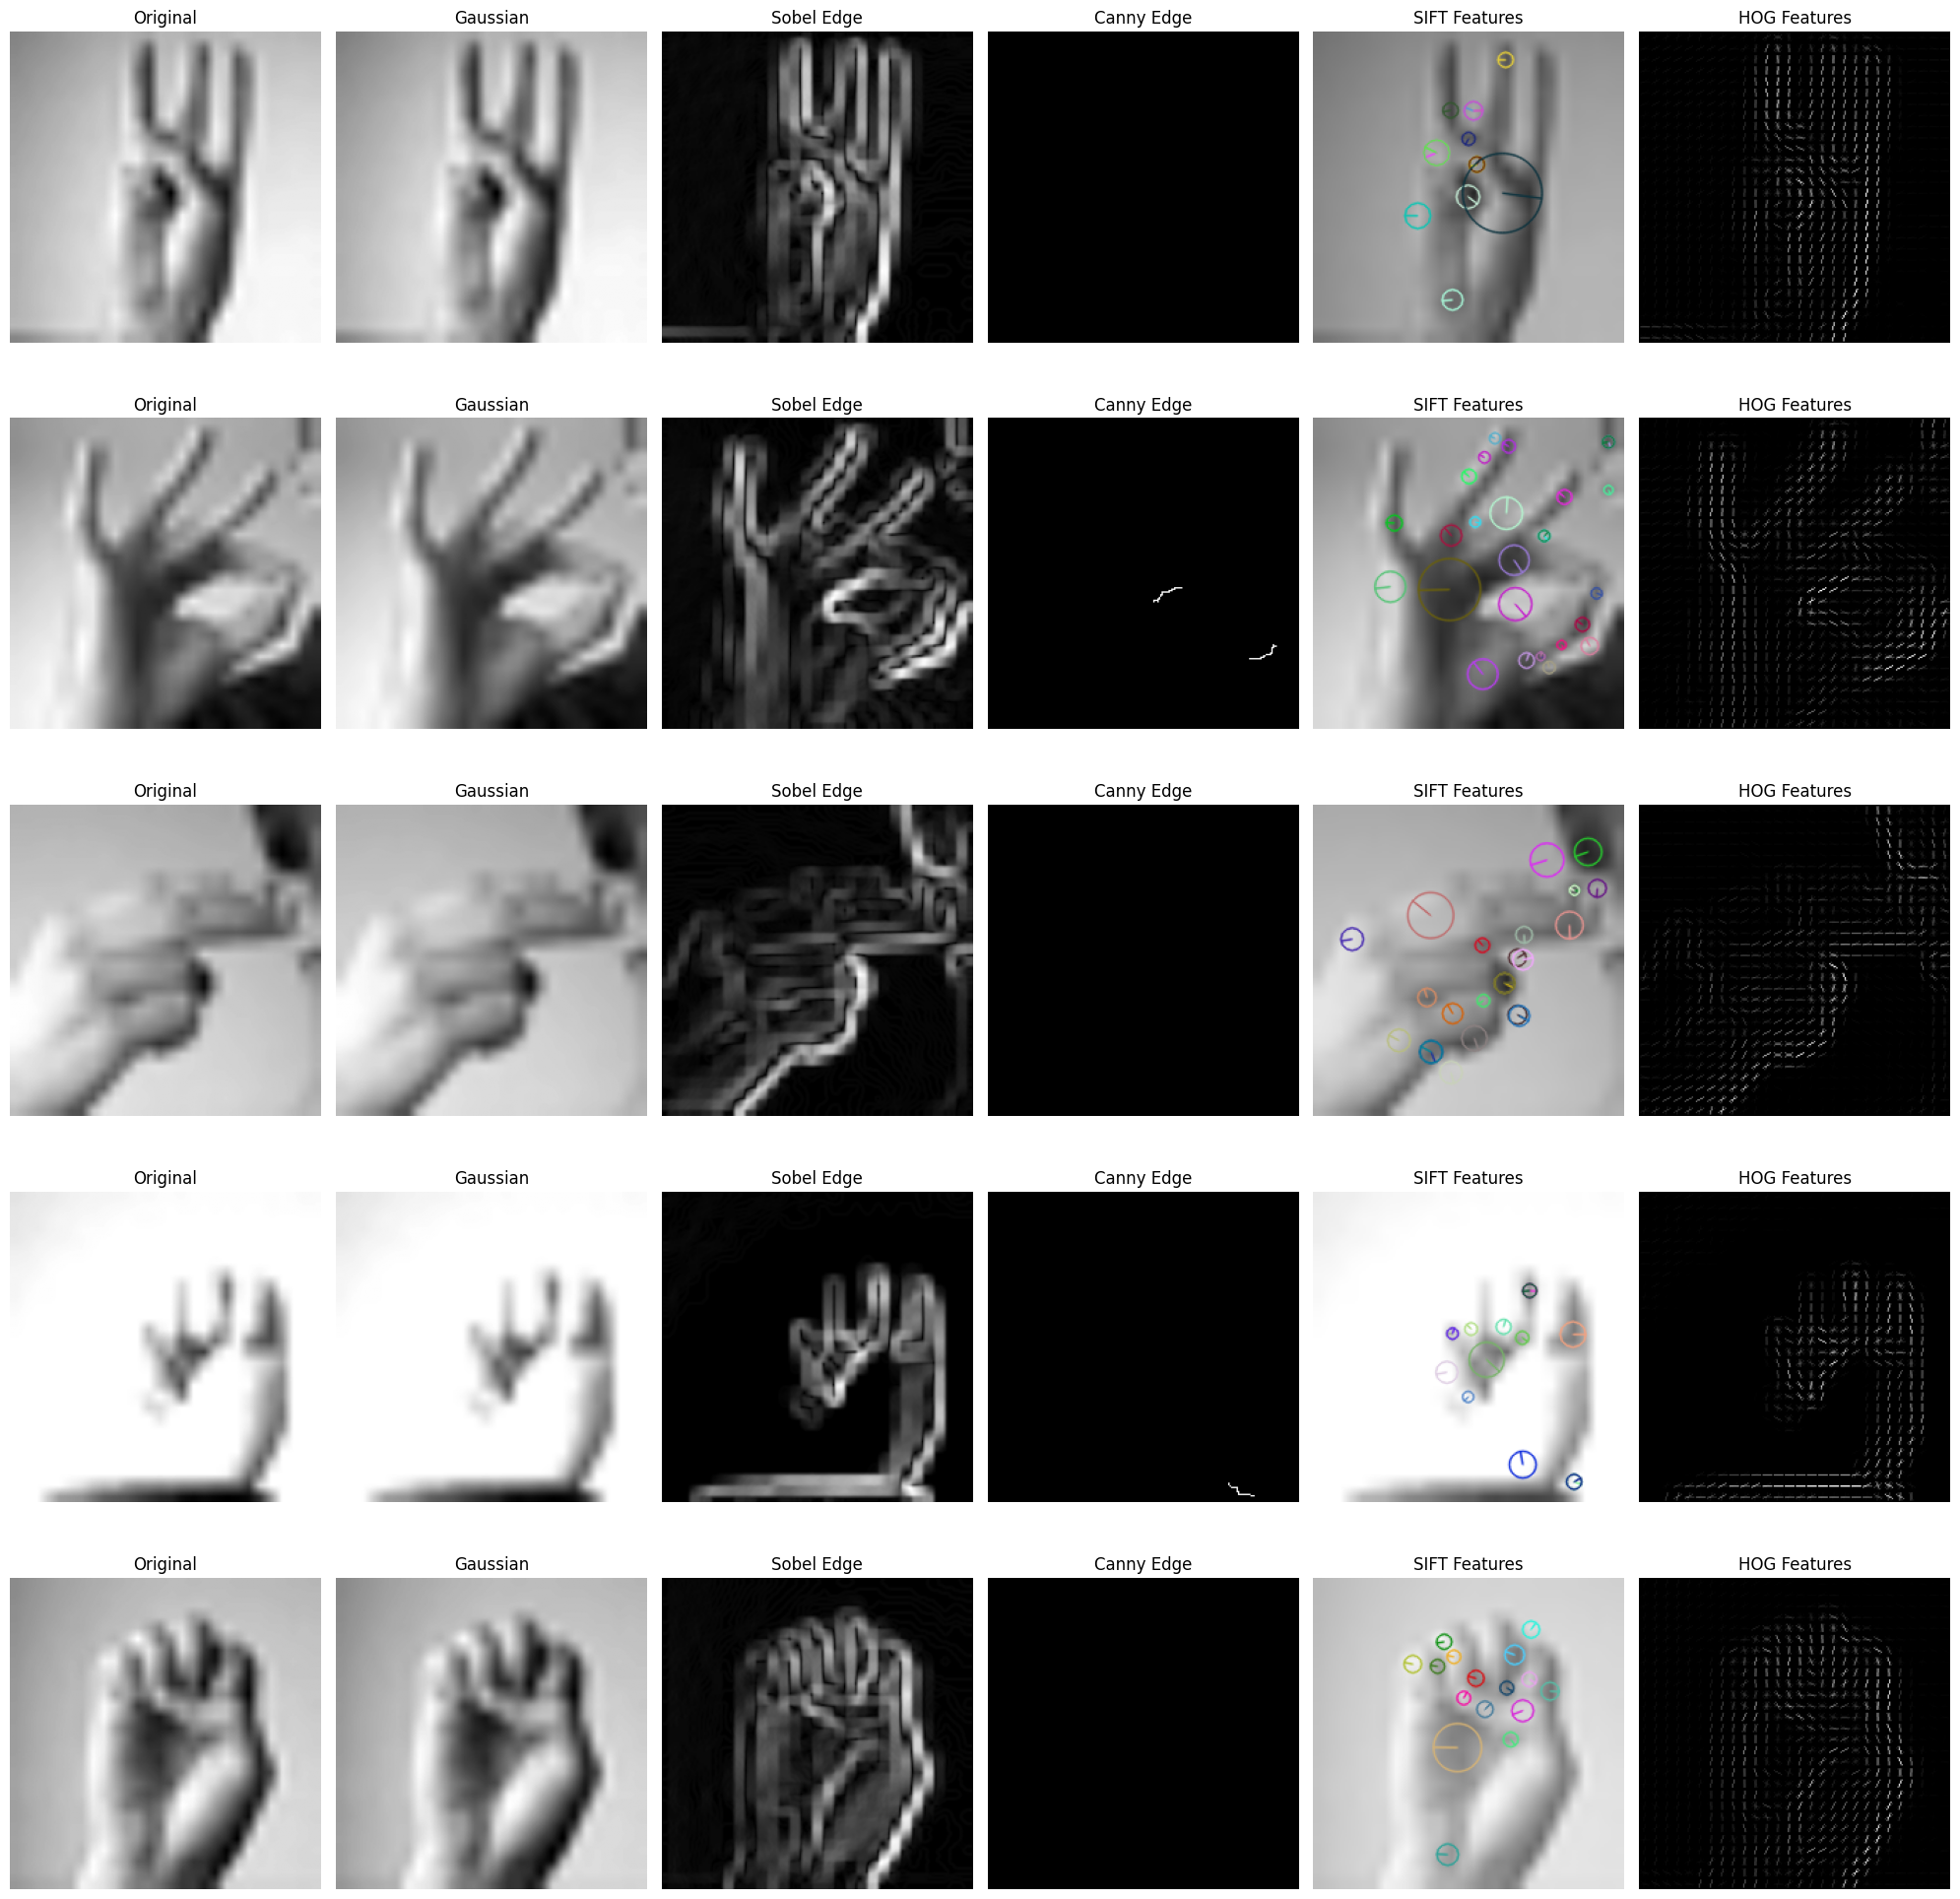

In [33]:
# ------------------------------
# Apply Processing to Each Image
# ------------------------------
fig, axes = plt.subplots(5, 6, figsize=(20, 20))

for i, img in enumerate(resized_images):
    # Apply Processing
    gaussian, median, bilateral = apply_filters(img)
    sobel, canny = detect_edges(img)
    corners = detect_corners(img.copy())
    sift_img = apply_sift(img)
    hog_img = compute_hog(img)

    # Display Results
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title("Original")

    axes[i, 1].imshow(gaussian, cmap='gray')
    axes[i, 1].set_title("Gaussian")

    axes[i, 2].imshow(sobel, cmap='gray')
    axes[i, 2].set_title("Sobel Edge")

    axes[i, 3].imshow(canny, cmap='gray')
    axes[i, 3].set_title("Canny Edge")

    axes[i, 4].imshow(sift_img, cmap='gray')
    axes[i, 4].set_title("SIFT Features")

    axes[i, 5].imshow(hog_img, cmap='gray')
    axes[i, 5].set_title("HOG Features")

    # Remove Axis
    for ax in axes[i]:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [34]:
# Normalize pixel values
X_train = x_train.iloc[:, 1:].values / 255.0
X_test = x_test.iloc[:, 1:].values / 255.0

In [35]:
# Reshape data into 28x28 format
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [41]:
#Performing OneHot Encoding

from tensorflow.keras.utils import to_categorical

y_train = X_train[:,0]
y_train_onehot = to_categorical(y_train, num_classes = 25)

print("Shape of y_train after One Hot Encoding : ", y_train_onehot.shape)


Shape of y_train after One Hot Encoding :  (27455, 28, 25)


In [42]:
from sklearn.model_selection import train_test_split

# Check shape before reshaping
print("Shape of X_train:", X_train.shape)

# Ensure correct column selection (Check if labels are present)
if X_train.shape[1] == 785:  # If labels are present, remove first column
    X_train_final = X_train[:, 1:].reshape(-1, 28, 28, 1)
else:  # If no labels, reshape directly
    X_train_final = X_train.reshape(-1, 28, 28, 1)

print("Shape of X_train after reshaping:", X_train_final.shape)

# Split the dataset into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_final, y_train_onehot, test_size=0.2, random_state=42
)

# Print shapes to verify correctness
print("X_train_split shape:", X_train_split.shape)
print("X_val shape:", X_val.shape)
print("y_train_split shape:", y_train_split.shape)
print("y_val shape:", y_val.shape)


Shape of X_train: (27455, 28, 28, 1)
Shape of X_train after reshaping: (27455, 28, 28, 1)
X_train_split shape: (21964, 28, 28, 1)
X_val shape: (5491, 28, 28, 1)
y_train_split shape: (21964, 28, 25)
y_val shape: (5491, 28, 25)


New shape of X_train_reshaped: (27455, 28, 28, 1)


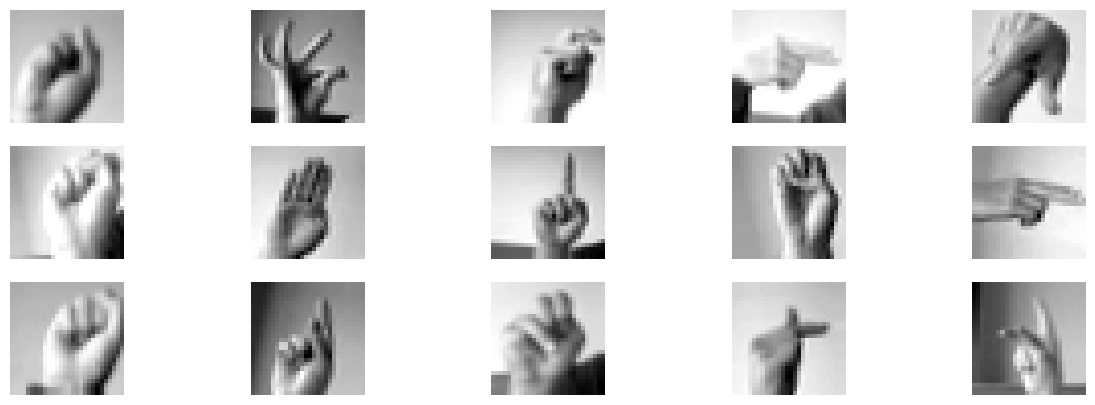

In [39]:
#Performing Data Augmentation
# Handle possible label column issue
if X_train.shape[1] == 785:  # Check if labels are included
    X_train_scaled = (X_train[:, 1:] * 255).astype("uint8")  # Remove labels
else:
    X_train_scaled = (X_train * 255).astype("uint8")  # No labels present

# Ensure correct reshape
num_samples = X_train_scaled.shape[0]
X_train_reshaped = X_train_scaled.reshape(num_samples, 28, 28, 1)
print("New shape of X_train_reshaped:", X_train_reshaped.shape)

# Defining Augmentation settings
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    rescale=1/255.0
)

# Generate a batch of augmented images
augmented_images = next(datagen.flow(X_train_reshaped, batch_size=15))

# Plot Augmented Images
fig, axes = plt.subplots(3, 5, figsize=(15, 5))
axes = axes.ravel()
for i in range(15):
    axes[i].imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    axes[i].axis("off")

plt.show()


In [47]:
print("Min Pixel Value in X_train:", std_pixel_values.min())
print("Max Pixel Value in X_train:", std_pixel_values.max())

# Generate a batch of augmented images
augmented_images = next(datagen.flow(X_train_reshaped, batch_size=15))

# Check the pixel value range of the augmented images
print("Min Pixel Value in Augmented Images:", augmented_images.min())
print("Max Pixel Value in Augmented Images:", augmented_images.max())

Min Pixel Value in X_train: 26.088459438426142
Max Pixel Value in X_train: 65.51289406143609
Min Pixel Value in Augmented Images: 0.0
Max Pixel Value in Augmented Images: 1.0


In [48]:
#Applying Gaussian Blur /  Median Filtering to reduce noise in image:
import cv2

def denoise_images(img_array):
    return np.array([cv2.GaussianBlur(img, (3, 3), 0) for img in img_array])

X_train = denoise_images(X_train)
X_test = denoise_images(X_test)
